In [30]:
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [31]:
heart_df = pd.read_csv("heart_cleveland_upload.csv")

In [32]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [33]:
heart_df = heart_df.rename(columns={'condition':'target'})

In [34]:
print(heart_df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [35]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [36]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [37]:
heart_df.shape

(303, 14)

In [38]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [40]:
x= heart_df.drop(columns= 'target')
y= heart_df.target

<AxesSubplot:>

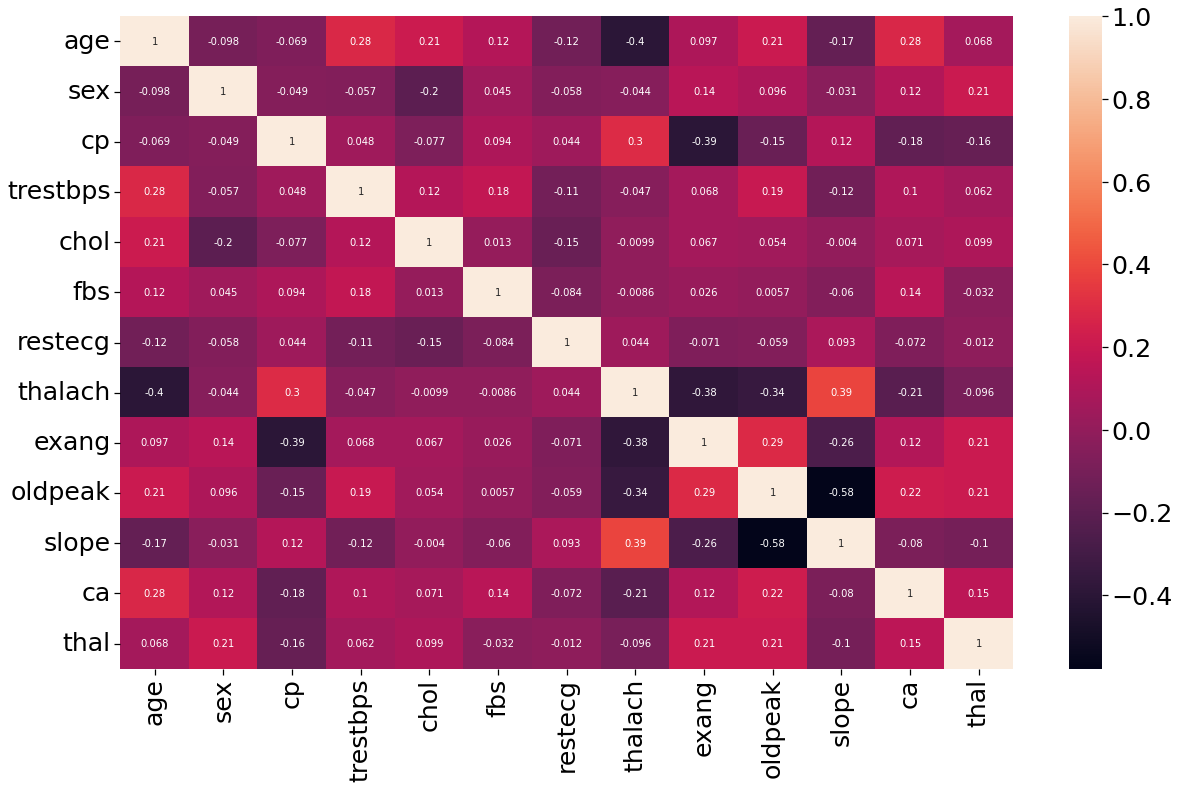

In [41]:
plt.figure(figsize=(20,12))
sns.heatmap(x.corr(),annot=True)

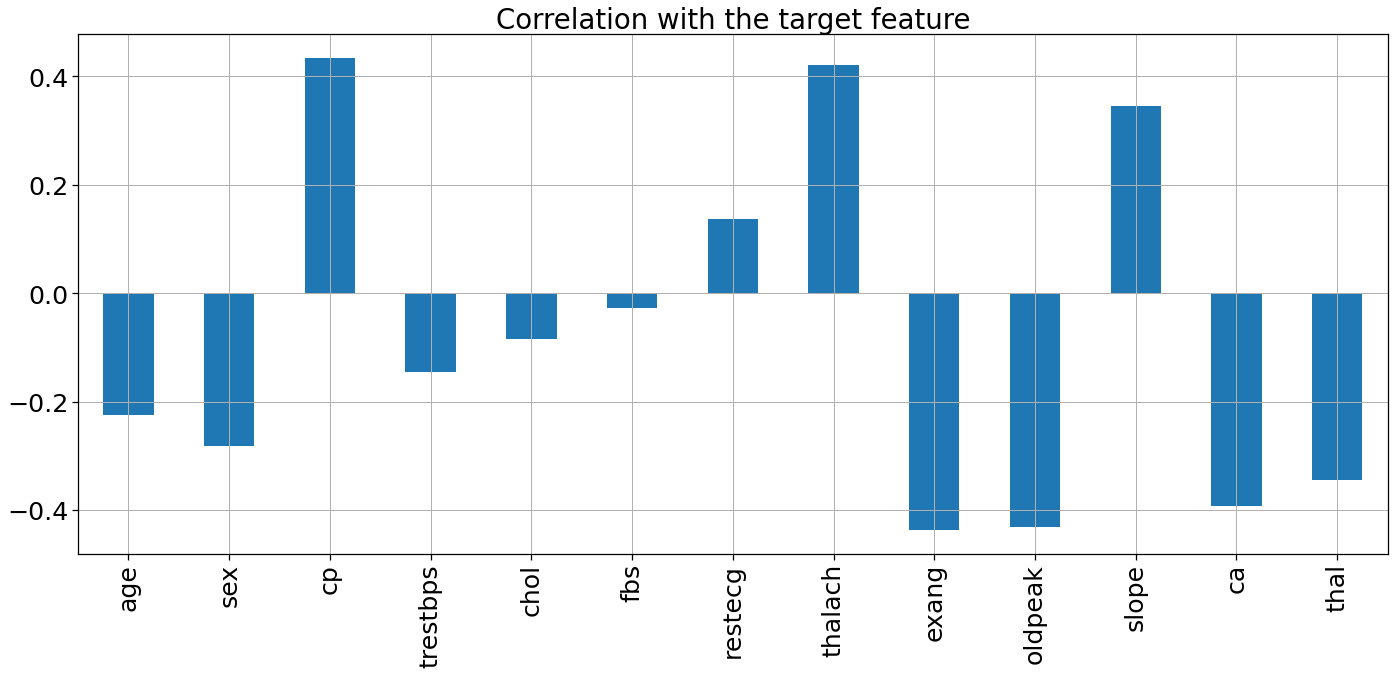

In [42]:
sns.set_context('notebook',font_scale = 2.3)
heart_df.drop('target', axis=1).corrwith(heart_df.target).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                        title="Correlation with the target feature")
plt.tight_layout()

In [43]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.20, random_state=42,stratify=y)

In [44]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2
114,55,1,1,130,262,0,1,155,0,0.0,2,0,2


In [45]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3


In [46]:
y_train

19     1
247    0
289    0
288    0
60     1
      ..
39     1
104    1
140    1
114    1
110    1
Name: target, Length: 242, dtype: int64

In [47]:
y_test

179    0
197    0
285    0
194    0
188    0
      ..
14     1
4      1
224    0
202    0
12     1
Name: target, Length: 61, dtype: int64

In [48]:
scaler= StandardScaler()

In [49]:
x_train_scaler= scaler.fit_transform(x_train)

In [50]:
x_train_scaler

array([[ 1.61047991, -1.46385011,  2.04442042, ...,  0.94818498,
         1.20703366, -0.56122273],
       [ 1.28205058,  0.68313005,  0.05747367, ..., -0.6677359 ,
         2.16789598, -2.21751422],
       [ 0.0778097 , -1.46385011, -0.93599971, ..., -0.6677359 ,
         0.24617134,  1.09506875],
       ...,
       [-0.36009607, -1.46385011,  1.05094704, ...,  0.94818498,
        -0.71469098, -0.56122273],
       [ 0.0778097 ,  0.68313005,  0.05747367, ...,  0.94818498,
        -0.71469098, -0.56122273],
       [ 1.0630977 , -1.46385011, -0.93599971, ...,  0.94818498,
        -0.71469098, -0.56122273]])

In [51]:
x_test_scaler= scaler.fit_transform(x_test)

In [52]:
model=RandomForestClassifier(n_estimators=20)
model.fit(x_train_scaler, y_train)
y_pred= model.predict(x_test_scaler)
p = model.score(x_test_scaler,y_test)
print(p)

0.7868852459016393


In [53]:
print('Classification Report\n', classification_report(y_test, y_pred))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred)*100),2)))



Classification Report
               precision    recall  f1-score   support

           0       0.86      0.64      0.73        28
           1       0.75      0.91      0.82        33

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.80      0.79      0.78        61

Accuracy: 78.69%



In [54]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[18 10]
 [ 3 30]]


In [55]:
model1=SVC()
model1.fit(x_train_scaler, y_train)
y_pred= model1.predict(x_test_scaler)
p = model1.score(x_test_scaler,y_test)
print(p)

0.8688524590163934


In [56]:
print('Classification Report\n', classification_report(y_test, y_pred))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.79      0.85        28
           1       0.84      0.94      0.89        33

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61

Accuracy: 86.89%



In [57]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[22  6]
 [ 2 31]]


In [58]:
filename = 'heart-disease-prediction-randomforest-model.pkl'
pickle.dump(model, open(filename, 'wb'))